<a href="https://colab.research.google.com/github/KentTran2016/opencv/blob/master/fashion_minist_Ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fashion minist version 1 by MauTC
references: https://www.youtube.com/watch?v=-E-s6QYy-Mc


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
print(f"Tensorflow: {tf.__version__}")
print ("\nKeras: ",keras.__version__)
#print(f"Tensorflow: {tf.__version__}\nKeras:{keras.__version__}")

Tensorflow: 2.13.0

Keras:  2.13.1


1. Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
y_train[0]

9

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
              "Ankle boot"]
class_nums = len(class_names)
print(class_nums)

10


In [ ]:
plt.imshow(X_train[0])

In [ ]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  len_x = x_data.shape[0]
  for idx in range (nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])

    true_label_str = f"Name: {class_names[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str, color = 'green', fontsize =12)


  plt.tight_layout()
  plt.show()

plot_data(X_train, y_train)

Image Pre-processing
* Reshaping it into the shape the model expects and scaling it so that all values are in the [0,1] interval
* Transform from init8 it into a float32


In [ ]:
# Convert to float32 & Scale images to the [0,1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [ ]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('float32'))

In [ ]:
X_train.dtype, X_test.dtype

(dtype('float32'), dtype('float32'))

In [ ]:
# Make sure images have shape (60000, 28, 28) => (60000, 28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
# Convert class vectors to binary class matrices
#1      =>sparse_categorical_crossentropy
#[0 1 0 0...] => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [ ]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

3. Network (ANN) Architecture (Xây dựng model ANN - Artificial Neural Network)


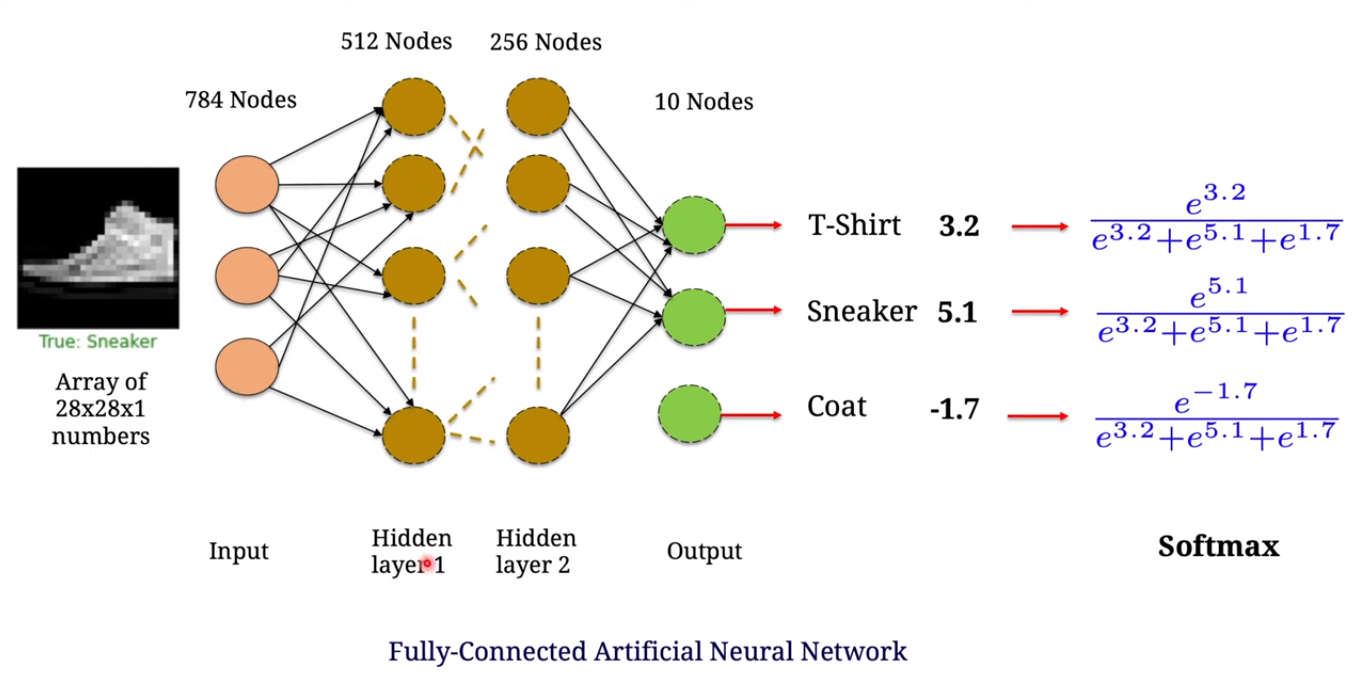

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # (28, 28, 1) --> (784)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])

model.summary()

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
epochs =10
batch_size = 256
history= model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size = batch_size,
          validation_split=0.1)

In [ ]:
history_dict=history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

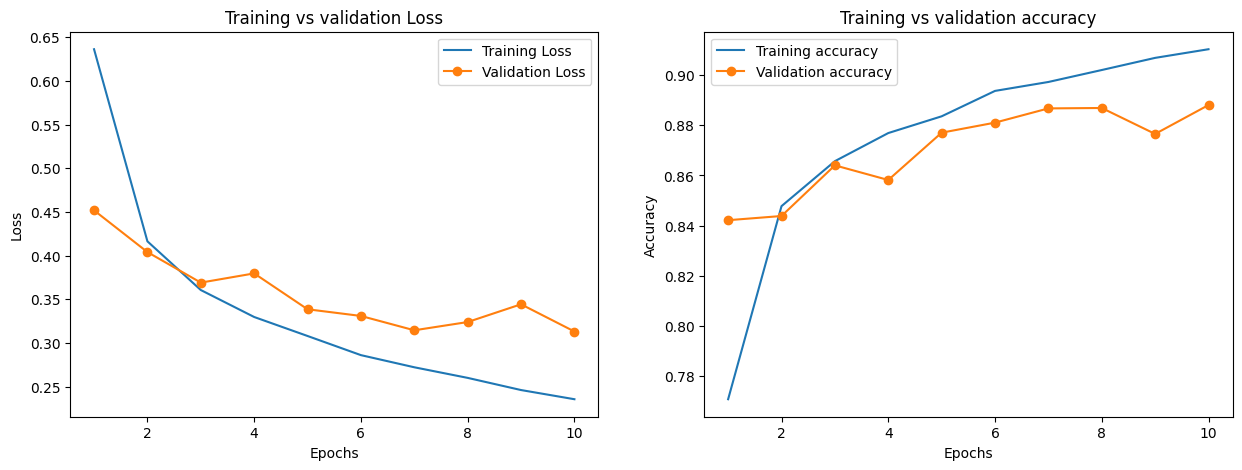

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label = 'Training Loss')
ax1.plot(epoch_runs, val_loss, label = 'Validation Loss', marker='o')
ax1.set(title='Training vs validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label = 'Training accuracy' )
ax2.plot(epoch_runs, val_acc, label = 'Validation accuracy', marker='o')
ax2.set(title='Training vs validation accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

4. Model Evaluation


In [ ]:
score = model.evaluate(X_test, y_test_label)

In [ ]:
print(f"Test Loss: {score[0]: .4f}")
print(f"Test Accuracy: {score[1]: .4f}")

5. Prediction

In [ ]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

In [ ]:
y_proba.round(3)

In [ ]:
predictions = np.argmax(y_proba, axis=1)

In [ ]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']